In [1]:
import importlib
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline


import preprocess as pp
import models
import engine
import utils

In [2]:
importlib.reload(pp)
importlib.reload(models)
importlib.reload(engine)

<module 'engine' from '/Users/davidspector/Home/UCSD/py_cnn/data-science/engine.py'>

In [3]:
DF_DIR = Path("/Volumes/CREST Data/David_S_Data/ExactData/Py_Outputs")
BATCH_SIZE = 15
EPOCHS = 400

In [4]:
df = pd.read_pickle(DF_DIR / Path('df_full.pkl'))

In [34]:
df['PS'][0].shape

(1, 3, 64, 1009)

In [33]:
for i, ps in enumerate(df['PS'].tolist()):
    df['PS'][i] = ps[:,:,:64,:]

/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_63669/2584665147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PS'][i] = ps[:,:,:64,:]
/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_63669/2584665147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PS'][i] = ps[:,:,:64,:]
/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_63669/2584665147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [5]:
df.keys()

Index(['Name', 'Hospital', 'Patient Number', 'Core', 'Label', 'PSA', 'MBF',
       'SS', 'SI', 'NPS', 'PS', 'rPS', 'f', 'PctCancer', 'PrimaryGrade',
       'SecondaryGrade', 'FamilyHistory', 'Gain', 'Depth'],
      dtype='object')

In [35]:
train_df, valid_df = pp.hospital_stratify(df,0.2)
valid_df, test_df = pp.hospital_stratify(valid_df, 0.5)

In [36]:
# Shuffle
train_df = train_df.sample(frac=1).reset_index(drop=True)
valid_df = valid_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [37]:
x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D, pct_cancer_weights, psa_train, psa_valid, psa_test = pp.create_4D(train_df, valid_df, test_df, 'PS', sub_gain=1)

100%|██████████| 31/31 [00:00<00:00, 369384.73it/s]


In [1]:
x_test_4D, y_test_4D, psa_test = pp.filter_data(x_test_4D, y_test_4D, psa_test, mask_thresh=2)

NameError: name 'pp' is not defined

In [39]:
x_train_4D = pp.data_norm_stand(x_train_4D)
x_valid_4D = pp.data_norm_stand(x_valid_4D)
x_test_4D = pp.data_norm_stand(x_test_4D)

In [40]:
Xa, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'a')
Xb, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'b')
Xc, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'c')
Xd, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'d')
Xe, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'e')
Xf, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'f')
Xg, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'g')
Xh, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'h')
Xi, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'i')
x_train = [Xa,Xb,Xc,Xd,Xe,Xf,psa_train]
y_train = Y

Xva, Yv = pp.resample_augment(x_valid_4D, Xa, y_valid_4D,'a')
Xvb, Yv = pp.resample_augment(x_valid_4D, Xb, y_valid_4D,'b')
Xvc, Yv = pp.resample_augment(x_valid_4D, Xc, y_valid_4D,'c')
Xvd, Yv = pp.resample_augment(x_valid_4D, Xd, y_valid_4D,'d')
Xve, Yv = pp.resample_augment(x_valid_4D, Xe, y_valid_4D,'e')
Xvf, Yv = pp.resample_augment(x_valid_4D, Xf, y_valid_4D,'f')
Xvg, Yv = pp.resample_augment(x_valid_4D, Xg, y_valid_4D,'g')
Xvh, Yv = pp.resample_augment(x_valid_4D, Xh, y_valid_4D,'h')
Xvi, Yv = pp.resample_augment(x_valid_4D, Xi, y_valid_4D,'i')
x_valid = [Xva,Xvb,Xvc,Xvd,Xve,Xvf,psa_valid]
y_valid = Yv

Xta, Yt = pp.resample_augment(x_test_4D, Xa, y_test_4D,'a')
Xtb, Yt = pp.resample_augment(x_test_4D, Xb, y_test_4D,'b')
Xtc, Yt = pp.resample_augment(x_test_4D, Xc, y_test_4D,'c')
Xtd, Yt = pp.resample_augment(x_test_4D, Xd, y_test_4D,'d')
Xte, Yt = pp.resample_augment(x_test_4D, Xe, y_test_4D,'e')
Xtf, Yt = pp.resample_augment(x_test_4D, Xf, y_test_4D,'f')
Xtg, Yt = pp.resample_augment(x_test_4D, Xg, y_test_4D,'g')
Xth, Yt = pp.resample_augment(x_test_4D, Xh, y_test_4D,'h')
Xti, Yt = pp.resample_augment(x_test_4D, Xi, y_test_4D,'i')
x_test = [Xta,Xtb,Xtc,Xtd,Xte,Xtf,psa_test]
y_test = Yt


In [41]:
workdir = "/Users/davidspector/Home/UCSD/py_cnn/data-science/models-out/"
log_dir = Path("/Users/davidspector/Home/UCSD/py_cnn/data-science/logs/")
batch_size = 15
epochs = 400
nFold = np.array([5,6,7,8,9,10,11,12,13,14,15])

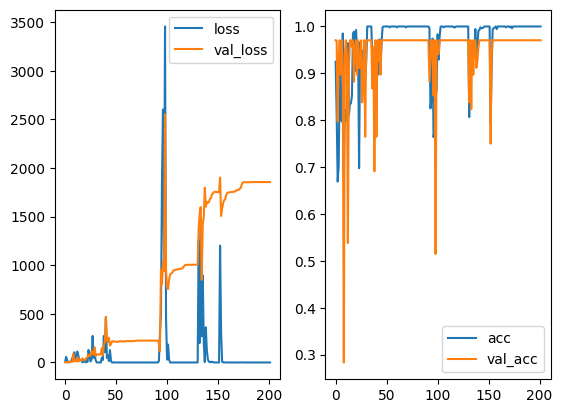

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 409ms/step - acc: 1.0000 - loss: 0.0000e+00 - val_acc: 0.9706 - val_loss: 1855.1968 - learning_rate: 8.5000e-04
Epoch 202: early stopping


: 

In [43]:
import utils
importlib.reload(utils)
importlib.reload(models)
importlib.reload(engine)
full_model = models.model_3d_00(x_train[0], y_train, psa_train, workdir)
full_model, history = engine.train_model(full_model, x_train, y_train, x_valid, y_valid, batch_size, epochs, pct_cancer_weights, log_dir) #0.0008 ,Xe,Xf,,Xve,Xvf